# For Exercises 21–30, continue working with the bank_marketing_training data set. Use either Python or R to solve each problem.

In [78]:
# Importing Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [79]:
# Importing Dataset 
bank_train = pd.read_csv("/Users/datascience/Desktop/ADS 502 Data Sets/Website Data Sets/bank_marketing_training.csv")

## 21. Produce the following graphs. What is the strength of each graph? Weakness?

### a. Bar graph of marital.

Text(0.5, 1.0, 'Marital')

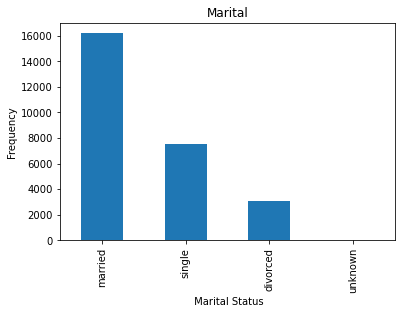

In [80]:
# Bar Graph of Marital Status
bank_train["marital"].value_counts().plot(kind = 'bar')
plt.xlabel(" Marital Status")
plt.ylabel("Frequency")
plt.title("Marital")

Strength: Describes frequency distribution, display relative number/proportions of multiple categories, summarizes a large amount of data in visual, and easily interpretable form

Weakness: Often requires additional explanation, fails to expose key impacts and patterns of data, can be easily manipulated to give false impressions, and lacking a response variable to show further insights(in this specific case). 

<div style="page-break-after: always;"></div> 

### b. Bar graph of marital, with overlay of response.

Text(0.5, 1.0, 'Bar Graph of Marital Status with Response Overlay')

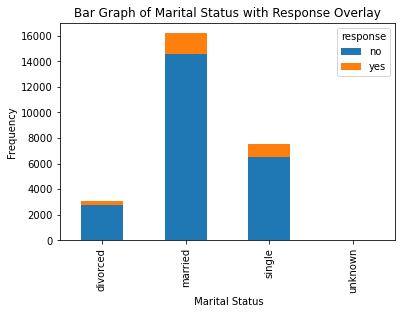

In [81]:
# Contingency Table of predictor (marital) and target variables (response)
crosstab_01 = pd.crosstab(bank_train["marital"], bank_train["response"])

# Bar Graph using Contigency Table
crosstab_01.plot(kind='bar', stacked = True)
plt.xlabel(" Marital Status")
plt.ylabel("Frequency")
plt.title("Bar Graph of Marital Status with Response Overlay")

Strength: Showing the distribution of the values of the categorical variable.

Weakness: Not clear which category has the greater proportion of respondents 

### c. Normalized bar graph of marital, with overlay of response.

Text(0.5, 1.0, ' Normalized Bar Graph of Marital Status with Response Overlay')

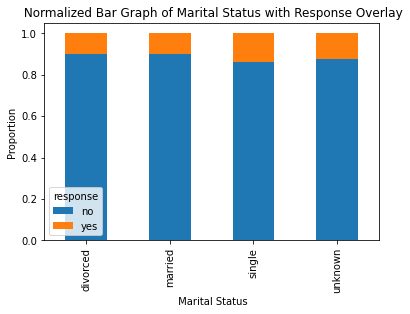

In [82]:
# Change values in each cell to a proportion of "no" andd "yes" response variables

# Divide cells in row 1 of the table by sum of the cells in row 1 and 2
crosstab_norm = crosstab_01.div(crosstab_01.sum(1), axis=0) # axis=0 to divide the rows of the table by these values

# Graph the Normalization
crosstab_norm.plot(kind='bar', stacked = True) #Stack the variables on top of eachother
plt.xlabel(" Marital Status")
plt.ylabel("Proportion")
plt.title(" Normalized Bar Graph of Marital Status with Response Overlay")

Strength: More easily compare the response proportions of the categorical variables.

Weakness: Becomes more complicated if there are uneven class intervals, and using too many/few classes can mask important patterns in the data.

## 22. Using the graph from Exercise 21c, describe the relationship between marital and response.

When evaluating the bank marketing data, the graph from 21c indicates that the highest proportion of 'yes' responses came from the 'single' marital status. Moreover, 'divorced' and 'married' had the lowest 'yes' responses with similar proportions. However, the 'married' category appears to have reported a slightly lower amount than 'married'. Therefore, we can infer from the graph that targeting 'single' individuals would yield the most positve responses among other marital statuses.

## 23. Do the following with the variables marital and response.

### a. Build a contingency table, being careful to have the correct variables representing the rows and columns. Report the counts and the column percentages.

In [83]:
# Crosstab with response variable representing the rows
crosstab_02 = pd.crosstab(bank_train["response"], bank_train["marital"])

##### Counts:


In [84]:
display(crosstab_02)

marital,divorced,married,single,unknown
response,,,,
no,2743,14579,6514,50
yes,312,1608,1061,7


##### Column Percentages:

In [85]:
# For Percentages - divide each column by the column sum
round(crosstab_02.div(crosstab_02.sum(0), axis=1)*100,1)

marital,divorced,married,single,unknown
response,,,,
no,89.8,90.1,86.0,87.7
yes,10.2,9.9,14.0,12.3


### b. Describe what the contingency table is telling you.

The count table indicates that married people had the largest amount of yes and no responses due to its large class size. In addition, divorced had the lowest number of yes and no responses. Moreover, based on the contingency percentage table, we can see that all marital statuses reported similar low percentages of yes responses. However, single had the highest proportion (14.4%) of yes while married had the lowest proportion (9.9%). 

## 24. Repeat the previous exercise, this time reporting the row percentages. Explain the difference between the interpretation of this table and the previous contingency table.

In [86]:
# Report Row Percentages for Contingency Table
round(crosstab_02.div(crosstab_02.sum(1), axis=0)*100,1)

marital,divorced,married,single,unknown
response,,,,
no,11.5,61.0,27.3,0.2
yes,10.4,53.8,35.5,0.2


Instead of reporting the percentage of yes and no responses for each marital status, the table above shows the percentages of marital status for each response. Looking at this table, we would conclude that married people had a significantly higher percentage of reporting yes (among all other statuses). However, this would be a false interpretation due to the unequal class sizes (married having the highest number of samples). On the contrast, the table results from Exercise 23.a shows that married status had the lowest proportion of yes responses.

## 25. Produce the following graphs. What is the strength of each graph? Weakness?

### a. Histogram of duration.

Text(0.5, 1.0, 'Duration Histogram')

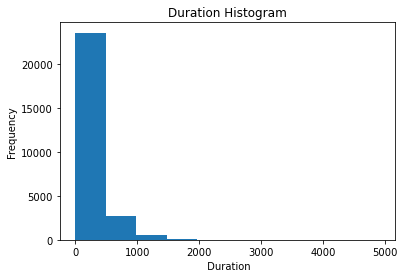

In [87]:
# Histogram of Duration
plt.hist([bank_train["duration"]], bins = 10 )
plt.xlabel(" Duration")
plt.ylabel("Frequency")
plt.title("Duration Histogram")

Strength: Insightful look at frequency distribution, simplistic, versatile.

Weakness: Can present data that is misleading, limited to two sets of data. 

### b. Histogram of duration, with overlay of response.

Text(0.5, 1.0, 'Histogram of Duration with Response Overlay')

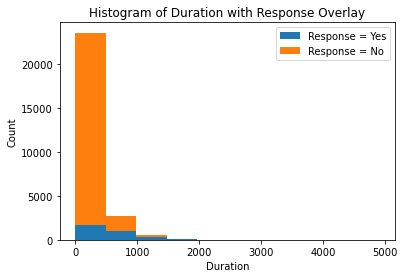

In [88]:
#Seperate the variables by response
dur_y = bank_train[bank_train.response == "yes"]['duration']
dur_n = bank_train[bank_train.response == "no"]['duration']

#Create Stacked Histogram of both variables
plt.hist([dur_y,dur_n], bins =10, stacked = True)
plt.legend(['Response = Yes', 'Response = No'])
plt.xlabel('Duration')
plt.ylabel('Count')
plt.title('Histogram of Duration with Response Overlay')

Strength: Useful for seeing the distribution of the values of a numeric variable.

Weakness: Difficult in interpreting any sort of pattern in the response proportion.

### c. Normalized histogram of duration, with overlay of response.


Text(0.5, 1.0, 'Normalized Histogram of Duration with Response Overlay')

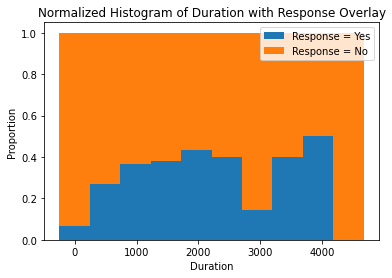

In [89]:
# Create a stacked histogram
#(n,bins,patches) = plt.hist([dur_y,dur_n], bins =10, stacked = True)

#Find proportion of each bin each variable represents
n_table = np.column_stack((n[0], n[1])) #Combine heights of the two variable bars
n_norm = n_table / n_table.sum(axis=1)[:, None] #Divide each row by the sum across that row
Bins = np.column_stack((bins[0:10], bins[1:11])) #Upper and Lower Bounds of each Bin

#Normalize Histogram
p1 = plt.bar(x=Bins[:,0], height = n_norm[:,0], width = Bins[:,1] - Bins[:,0])
p2 = plt.bar(x=Bins[:,0], height = n_norm[:,1], width = Bins[:,1] - Bins[:,0], bottom = n_norm[:,0])

plt.legend(['Response = Yes', 'Response = No'])
plt.xlabel('Duration')
plt.ylabel('Proportion')
plt.title('Normalized Histogram of Duration with Response Overlay')


Strength: Easier to interpret a pattern for the response variable.

Weakness: Does not show the original(correct) distribution of the variable in focus (i.e., 'Duration').